In [1]:
#Importing the necessary  libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Creating a dataframe
wine_data = pd.read_csv(r'C:\Users\Amal\Downloads\KNN + SVM + Naive Bayes + PCA\Wine.csv',
                             header=0)

In [3]:
wine_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
wine_data.shape

(178, 14)

# Q.1 Compute and plot those feature which are related to each other?

In [5]:
wine_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [7]:
wine_data.info

<bound method DataFrame.info of      Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  

In [8]:
wine_data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
Customer_Segment          int64
dtype: object

In [9]:
wine_data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [10]:
#To check if there are any special characters in place of values 
for i in wine_data.columns:
    print({i:wine_data[i].unique()})

{'Alcohol': array([14.23, 13.2 , 13.16, 14.37, 13.24, 14.2 , 14.39, 14.06, 14.83,
       13.86, 14.1 , 14.12, 13.75, 14.75, 14.38, 13.63, 14.3 , 13.83,
       14.19, 13.64, 12.93, 13.71, 12.85, 13.5 , 13.05, 13.39, 13.3 ,
       13.87, 14.02, 13.73, 13.58, 13.68, 13.76, 13.51, 13.48, 13.28,
       13.07, 14.22, 13.56, 13.41, 13.88, 14.21, 13.9 , 13.94, 13.82,
       13.77, 13.74, 13.29, 13.72, 12.37, 12.33, 12.64, 13.67, 12.17,
       13.11, 13.34, 12.21, 12.29, 13.49, 12.99, 11.96, 11.66, 13.03,
       11.84, 12.7 , 12.  , 12.72, 12.08, 12.67, 12.16, 11.65, 11.64,
       12.69, 11.62, 12.47, 11.81, 12.6 , 12.34, 11.82, 12.51, 12.42,
       12.25, 12.22, 11.61, 11.46, 12.52, 11.76, 11.41, 11.03, 12.77,
       11.45, 11.56, 11.87, 12.07, 12.43, 11.79, 12.04, 12.86, 12.88,
       12.81, 12.53, 12.84, 13.36, 13.52, 13.62, 12.87, 13.32, 13.08,
       12.79, 13.23, 12.58, 13.17, 13.84, 12.45, 14.34, 12.36, 13.69,
       12.96, 13.78, 13.45, 12.82, 13.4 , 12.2 , 14.16, 13.27, 14.13])}
{'Mali

There are no missing or unique values present in our data. We can consider it as clean data

In [11]:
corr_df = wine_data.corr(method='pearson')
print(corr_df)

                       Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  \
Alcohol               1.000000    0.094397  0.211545     -0.310235   0.270798   
Malic_Acid            0.094397    1.000000  0.164045      0.288500  -0.054575   
Ash                   0.211545    0.164045  1.000000      0.443367   0.286587   
Ash_Alcanity         -0.310235    0.288500  0.443367      1.000000  -0.083333   
Magnesium             0.270798   -0.054575  0.286587     -0.083333   1.000000   
Total_Phenols         0.289101   -0.335167  0.128980     -0.321113   0.214401   
Flavanoids            0.236815   -0.411007  0.115077     -0.351370   0.195784   
Nonflavanoid_Phenols -0.155929    0.292977  0.186230      0.361922  -0.256294   
Proanthocyanins       0.136698   -0.220746  0.009652     -0.197327   0.236441   
Color_Intensity       0.546364    0.248985  0.258887      0.018732   0.199950   
Hue                  -0.071747   -0.561296 -0.074667     -0.273955   0.055398   
OD280                 0.0723

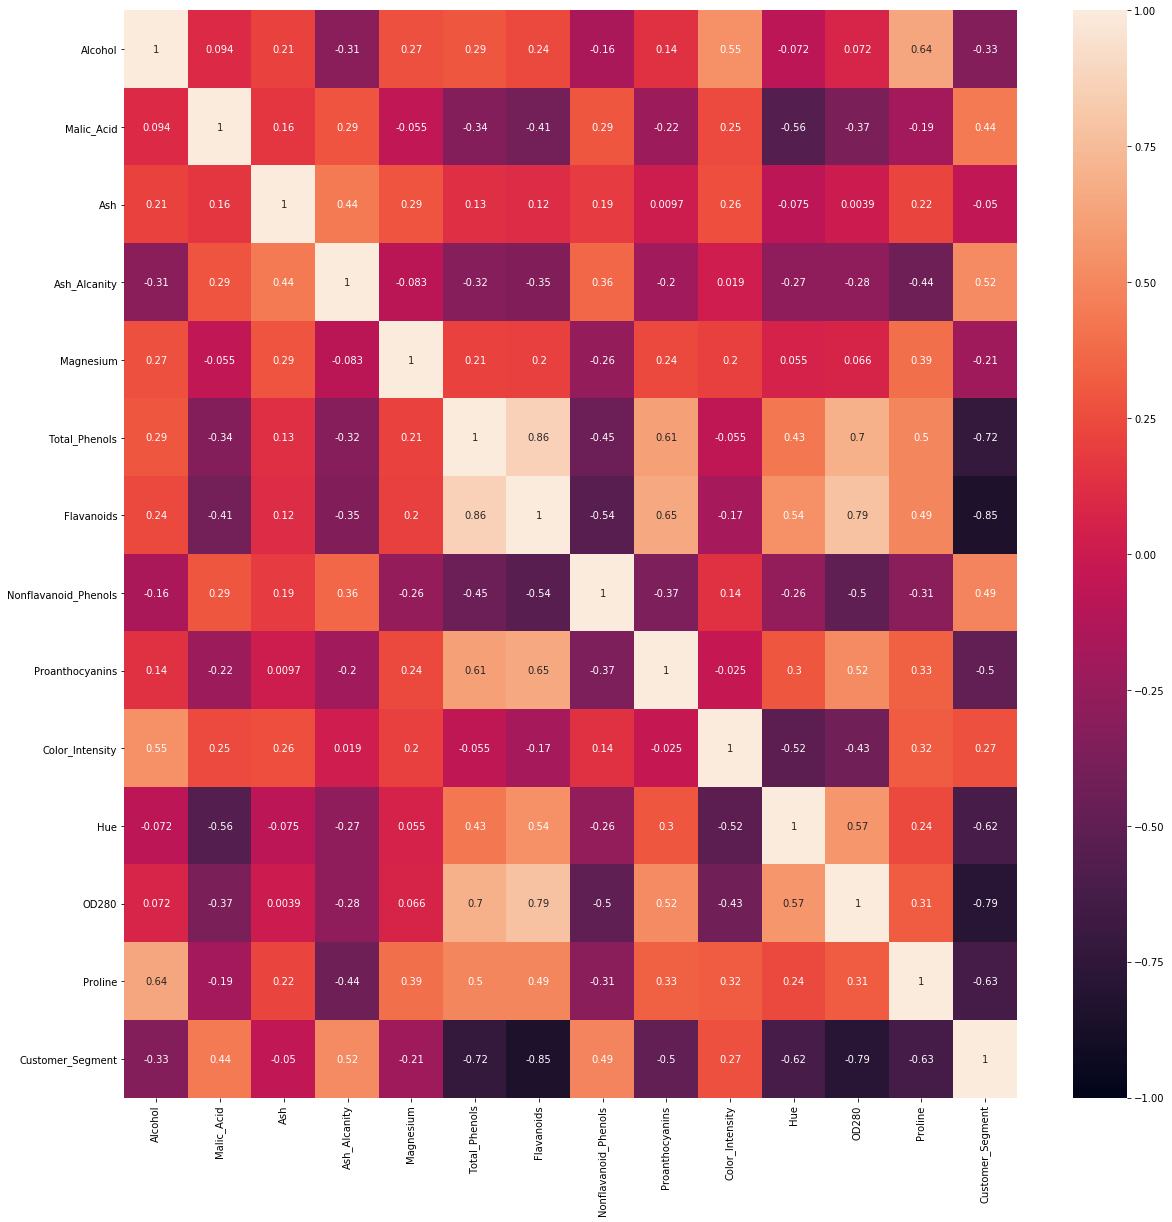

In [12]:
corr = wine_data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, vmin=-1.0,vmax=1.0,annot=True)
plt.yticks(rotation=0)
plt.show()

# Q.2 What are the optimum number of principal components in PCA?


### Creating X & Y

In [13]:
X = wine_data.values[:,:-1]
Y = wine_data.values[:,-1]

In [14]:
print(X.shape)
print(Y.shape)

(178, 13)
(178,)


### Scaling the data

As there are different feature variables in X, it can have a possibility of giving more importance to the variables having greater range and give less important to variables having small range which is not suitable. So to overcome this problem scaling is done on the all variables in X, as it will bring all the variables in a same range

In [15]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X)
X = scaler.transform(X)

### Train-Test Split

In [16]:
from sklearn.model_selection import train_test_split  #<1000=in range of 80-20  &  >1000=in range of 70-30

#Split the data into test and train
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [17]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(142, 13)
(142,)
(36, 13)
(36,)


In [18]:
#Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=None) #to view the entire eigen vector,no subsetting
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.37156174 0.2019533  0.10959523 0.06202959 0.05758885 0.05272733
 0.03940884 0.02534848 0.0211269  0.01982826 0.0180694  0.01202182
 0.00874027]


In [19]:
#Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=8) #to view the entire eigen vector,no subsetting
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.37156174 0.2019533  0.10959523 0.06202959 0.05758885 0.05272733
 0.03940884 0.02534848]


The optimum value of principal components in PCA (n) = 8

# Q.3 Build a KNN classifier considering optimal number of principal components and value of K and state its score

In [20]:
#predicting using the KNeighbors_Classifier
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))),
                              metric='euclidean')

#euclidean,manhattan,minkowski
#fit the model on the data and predict the values
model_KNN.fit(X_train,Y_train)

Y_pred=model_KNN.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

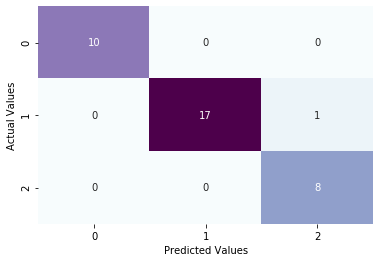

Classification report:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        10
         2.0       1.00      0.94      0.97        18
         3.0       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36

Accuracy of the model:  0.9722222222222222


In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

### Hyper-Parameter Tuning

In [22]:
from sklearn.metrics import accuracy_score
my_dict={}
for K in range(1,10):
    model_KNN=KNeighborsClassifier(n_neighbors=K,metric='euclidean')
    model_KNN.fit(X_train,Y_train)
    Y_pred=model_KNN.predict(X_test)
    print("Accuracy is",accuracy_score(Y_test,Y_pred), "for K-Value:",K)
    my_dict[K]=accuracy_score(Y_test,Y_pred)

Accuracy is 0.9444444444444444 for K-Value: 1
Accuracy is 0.9166666666666666 for K-Value: 2
Accuracy is 0.9166666666666666 for K-Value: 3
Accuracy is 0.9166666666666666 for K-Value: 4
Accuracy is 0.9166666666666666 for K-Value: 5
Accuracy is 0.9166666666666666 for K-Value: 6
Accuracy is 0.9722222222222222 for K-Value: 7
Accuracy is 0.9444444444444444 for K-Value: 8
Accuracy is 0.9722222222222222 for K-Value: 9


In [ ]:
for k in my_dict:
    if my_dict[k]==max(my_dict.values()):
        print(k,":",my_dict[k])

### For k=7

In [23]:
#predicting using the KNeighbors_Classifier
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=7, metric='euclidean')

#euclidean,manhattan,minkowski
#fit the model on the data and predict the values
model_KNN.fit(X_train,Y_train)

Y_pred=model_KNN.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

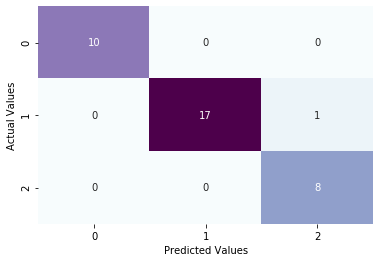

Classification report:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        10
         2.0       1.00      0.94      0.97        18
         3.0       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36

Accuracy of the model:  0.9722222222222222


In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

### For k=9

In [25]:
#predicting using the KNeighbors_Classifier
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=9, metric='euclidean')

#euclidean,manhattan,minkowski
#fit the model on the data and predict the values
model_KNN.fit(X_train,Y_train)

Y_pred=model_KNN.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

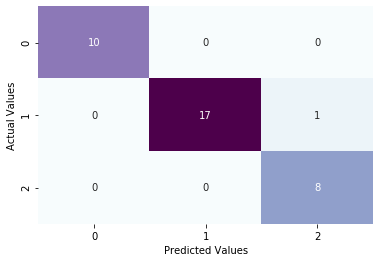

Classification report:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        10
         2.0       1.00      0.94      0.97        18
         3.0       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36

Accuracy of the model:  0.9722222222222222


In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

#### For k=7 & k= 9 we are getting simliar results with same and a good accuracy score as well as a satisfied clasification report. So we can choose any value of k i.e. either '7' or '9'. It is preferable to go with high value of k as it gets more values for predictions.

# Q.4 Build a SVM Classifier and tune the hyperparameters to get the optimum model

In [27]:
# Fitting SVC to the training set
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',gamma=0.1,C=1)
classifier.fit(X_train,Y_train)
#predicting the test set results
Y_pred = classifier.predict(X_test)

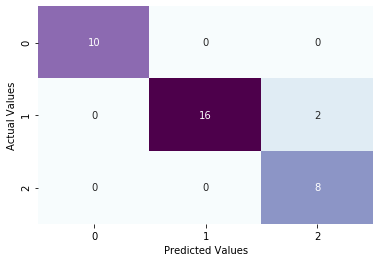

Classification report:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        10
         2.0       1.00      0.89      0.94        18
         3.0       0.80      1.00      0.89         8

    accuracy                           0.94        36
   macro avg       0.93      0.96      0.94        36
weighted avg       0.96      0.94      0.95        36

Accuracy of the model:  0.9444444444444444


In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

# Q.5 Build a Naive Bayes Classifier and comment about its accuracy.

In [29]:
from sklearn.naive_bayes import BernoulliNB

model_NB = BernoulliNB()

#fit the model on the data and predict the values
model_NB.fit(X_train,Y_train)

Y_pred = model_NB.predict(X_test)
#print(Y_pred)
#print(list(zip(Y_test,Y_pred)))

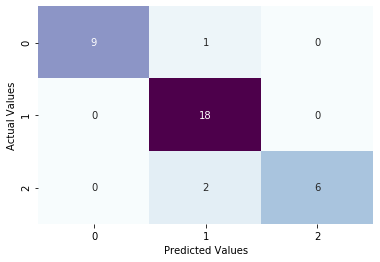

Classification report:
              precision    recall  f1-score   support

         1.0       1.00      0.90      0.95        10
         2.0       0.86      1.00      0.92        18
         3.0       1.00      0.75      0.86         8

    accuracy                           0.92        36
   macro avg       0.95      0.88      0.91        36
weighted avg       0.93      0.92      0.92        36

Accuracy of the model:  0.9166666666666666


In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

# Q.6 Compare all of the models and justify your choice about the optimum model.

From all the models we built on the dataset KNN was the best Model to be used -
1. It gave a high accuracy score of 97.22%
2. We found 2 optimum values for k (7 & 9)
3. The recall values, precision values, F1 score  (i.e. classification report) was satisfying.
4. Only 1 value was misclassified.
5. So, with all the points taken into consideration ,KNN is a good choice for Optimum Model.